GitHub URL https://github.com/MarkRuane/UCDPA_MarkRuane

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Importing My Data Set

Source - https://www.kaggle.com/datasets/rishidamarla/fifa-players-ratings 

In [61]:
df=pd.read_csv("fifa_cleaned.csv", index_col='full_name')

In [62]:
df.head(8)

,id,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
full_name,,,,,,,,,,,,,,,,,,,,,
Lionel Andrés Messi Cuccittini,158023,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
Christian Dannemann Eriksen,190460,C. Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
Paul Pogba,195864,P. Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
Lorenzo Insigne,198219,L. Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
Kalidou Koulibaly,201024,K. Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
Virgil van Dijk,203376,V. van Dijk,1991-07-08,27,193.04,92.1,CB,Netherlands,88,90,...,78+3,82+3,82+3,82+3,78+3,80+3,86+3,86+3,86+3,80+3
Kylian Mbappé,231747,K. Mbappé,1998-12-20,20,152.40,73.0,"RW,ST,RM",France,88,95,...,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3
Sergio Leonel Agüero del Castillo,153079,S. Agüero,1988-06-02,30,172.72,69.9,ST,Argentina,89,89,...,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3


# Step 2: Preperation


First of all there is 92 columns in this DataSet, which I want to cut down as lots of the columns will be no use to me later on when performing my analysis



In [63]:
df = df[['name', 'birth_date', 'age', 'height_cm', 'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'preferred_foot', 'club_team', 'club_rating', 'club_position']]


In [64]:
df.head(5)


,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position
full_name,,,,,,,,,,,,,,,
Lionel Andrés Messi Cuccittini,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW
Christian Dannemann Eriksen,C. Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,Tottenham Hotspur,83.0,LCM
Paul Pogba,P. Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,Manchester United,82.0,LCM
Lorenzo Insigne,L. Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,Napoli,82.0,LS
Kalidou Koulibaly,K. Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,Napoli,82.0,LCB


Using iloc to get the full stats on the first two players in my data frame



In [65]:
df.iloc[[0, 1]]


,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position
full_name,,,,,,,,,,,,,,,
Lionel Andrés Messi Cuccittini,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW
Christian Dannemann Eriksen,C. Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,Tottenham Hotspur,83.0,LCM


Using loc to discover all stats relating to a specific player



In [66]:
df.loc['Lionel Andrés Messi Cuccittini']


name                  L. Messi
birth_date          1987-06-24
age                         31
height_cm               170.18
weight_kgs                72.1
positions             CF,RW,ST
nationality          Argentina
overall_rating              94
potential                   94
value_euro         110500000.0
wage_euro             565000.0
preferred_foot            Left
club_team         FC Barcelona
club_rating               86.0
club_position               RW
Name: Lionel Andrés Messi Cuccittini, dtype: object

Grouping to see which is the top 10 nationalities has the Most Players in this dataframe



In [67]:
df.groupby(['nationality']).count()['name'].sort_values(ascending=False).head(10)


nationality
England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: name, dtype: int64

Merging DataFrames



In [68]:
gdp_pop=pd.read_csv('gdp_pop.csv')


In [69]:
gdp_pop

,Unnamed: 0,Ranking,Country,GDP per Capita,2022 Population
0,0,1,Luxembourg,"$118,001",642371
1,1,2,Singapore,"$97,057",5943546
2,2,3,Ireland,"$94,392",5020199
3,3,4,Qatar,"$93,508",2979915
4,4,5,Switzerland,"$72,874",8773637
...,...,...,...,...,...
180,180,190,Malawi,$993,20180839
181,181,191,Central African Republic,$979,5016678
182,182,192,Somalia,$925,16841795
183,183,193,South Sudan,$791,11618511


In [70]:
df = pd.merge(df, gdp_pop, left_on='nationality', right_on='Country')


In [71]:
df.head()


,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Unnamed: 0,Ranking,Country,GDP per Capita,2022 Population
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,61,64,Argentina,"$20,751",46010234
1,S. Agüero,1988-06-02,30,172.72,69.9,ST,Argentina,89,89,64500000.0,300000.0,Right,Manchester City,85.0,ST,61,64,Argentina,"$20,751",46010234
2,P. Dybala,1993-11-15,25,152.40,74.8,"CAM,RW",Argentina,89,94,89000000.0,205000.0,Left,Juventus,85.0,RW,61,64,Argentina,"$20,751",46010234
3,G. Higuaín,1987-12-10,31,185.42,88.9,ST,Argentina,87,87,48500000.0,205000.0,Right,Chelsea,83.0,ST,61,64,Argentina,"$20,751",46010234
4,M. Icardi,1993-02-19,26,154.94,74.8,ST,Argentina,87,90,64500000.0,130000.0,Right,Inter,82.0,ST,61,64,Argentina,"$20,751",46010234


Removing columns I don't need which we got from merging the new dataset



In [72]:
df = df[df.columns[~df.columns.isin(['Unnamed: 0', 'Ranking'])]]


In [73]:
df = df.sort_values(by = 'overall_rating', ascending=False)


In [74]:
df.head(5)


,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,GDP per Capita,2022 Population
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,"$20,751",46010234
8168,Cristiano Ronaldo,1985-02-05,34,187.96,83.0,"ST,LW",Portugal,94,94,77000000.0,405000.0,Right,Juventus,85.0,LW,Portugal,"$34,043",10140570
6962,Neymar Jr,1992-02-05,27,175.26,68.0,"LW,CAM",Brazil,92,92,108000000.0,290000.0,Right,Paris Saint-Germain,84.0,LAM,Brazil,"$14,916",215353593
4707,L. Suárez,1987-01-24,32,182.88,86.2,ST,Uruguay,91,91,80000000.0,455000.0,Right,FC Barcelona,86.0,ST,Uruguay,"$22,459",3496016
6039,E. Hazard,1991-01-07,28,172.72,76.2,"LW,CF",Belgium,91,91,93000000.0,340000.0,Right,Chelsea,83.0,LW,Belgium,"$51,096",11668278


Creating a new column using .between statement in order to break down plateys by age into 3 different stages of their career

In [75]:
player_level = [
    (df['age'].between(30, 99)),
    (df['age'].between(24, 29)),
    (df['age'].between(15, 23))
    
    ]

In [76]:
values = ['Experienced', 'Peak Years', 'Rising Star']


In [77]:
df['Player Level'] = np.select(player_level, values)


In [78]:
df.head()


,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,GDP per Capita,2022 Population,Player Level
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,"$20,751",46010234,Experienced
8168,Cristiano Ronaldo,1985-02-05,34,187.96,83.0,"ST,LW",Portugal,94,94,77000000.0,405000.0,Right,Juventus,85.0,LW,Portugal,"$34,043",10140570,Experienced
6962,Neymar Jr,1992-02-05,27,175.26,68.0,"LW,CAM",Brazil,92,92,108000000.0,290000.0,Right,Paris Saint-Germain,84.0,LAM,Brazil,"$14,916",215353593,Peak Years
4707,L. Suárez,1987-01-24,32,182.88,86.2,ST,Uruguay,91,91,80000000.0,455000.0,Right,FC Barcelona,86.0,ST,Uruguay,"$22,459",3496016,Experienced
6039,E. Hazard,1991-01-07,28,172.72,76.2,"LW,CF",Belgium,91,91,93000000.0,340000.0,Right,Chelsea,83.0,LW,Belgium,"$51,096",11668278,Peak Years


Inserting a new column using .loc in order to classify player positions into Goalkeeper, Defenders, Midfielders and Forwards

In [79]:
df.loc[(df['club_position'] == 'RW') | (df['club_position'] == 'ST') | (df['club_position'] == 'LW') | (df['club_position'] == 'CF') | (df['club_position'] == 'LF') | (df['club_position'] == 'RF') | (df['club_position'] == 'RS') | (df['club_position'] == 'LS'), 'player_position'] = 'Forward'
df.loc[(df['club_position'] == 'CAM') | (df['club_position'] == 'CDM') | (df['club_position'] == 'CM') | (df['club_position'] == 'LAM') | (df['club_position'] == 'LCM') | (df['club_position'] == 'LDM') | (df['club_position'] == 'LM') | (df['club_position'] == 'RAM') | (df['club_position'] == 'RCM') | (df['club_position'] == 'RDM') | (df['club_position'] == 'RM'), 'player_position'] = 'Midfield'
df.loc[(df['club_position'] == 'CB') | (df['club_position'] == 'LB') | (df['club_position'] == 'LCB') | (df['club_position'] == 'LWB') | (df['club_position'] == 'RB') | (df['club_position'] == 'RCB') | (df['club_position'] == 'RWB'), 'player_position'] = 'Defence'
df.loc[(df['club_position'] == 'GK'), 'player_position'] = 'Goalkeeper'

In [80]:
df


,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,GDP per Capita,2022 Population,Player Level,player_position
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,"$20,751",46010234,Experienced,Forward
8168,Cristiano Ronaldo,1985-02-05,34,187.96,83.0,"ST,LW",Portugal,94,94,77000000.0,405000.0,Right,Juventus,85.0,LW,Portugal,"$34,043",10140570,Experienced,Forward
6962,Neymar Jr,1992-02-05,27,175.26,68.0,"LW,CAM",Brazil,92,92,108000000.0,290000.0,Right,Paris Saint-Germain,84.0,LAM,Brazil,"$14,916",215353593,Peak Years,Midfield
4707,L. Suárez,1987-01-24,32,182.88,86.2,ST,Uruguay,91,91,80000000.0,455000.0,Right,FC Barcelona,86.0,ST,Uruguay,"$22,459",3496016,Experienced,Forward
6039,E. Hazard,1991-01-07,28,172.72,76.2,"LW,CF",Belgium,91,91,93000000.0,340000.0,Right,Chelsea,83.0,LW,Belgium,"$51,096",11668278,Peak Years,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10497,N. Fuentes,1999-08-31,19,172.72,66.2,RB,Chile,47,64,50000.0,1000.0,Right,Unión Española,65.0,SUB,Chile,"$23,366",19250195,Rising Star,NaN
2334,J. Milli,2000-04-27,18,182.88,78.0,GK,Italy,47,65,50000.0,1000.0,Right,Lecce,68.0,RES,Italy,"$40,861",60262770,Rising Star,NaN
3695,A. Kaltner,1999-10-24,19,175.26,72.1,ST,Germany,47,61,60000.0,1000.0,Right,SpVgg Unterhaching,65.0,RES,Germany,"$54,076",83883596,Rising Star,NaN
3696,C. Ehlich,1999-02-02,20,170.18,68.0,RB,Germany,47,59,40000.0,1000.0,Right,SpVgg Unterhaching,65.0,SUB,Germany,"$54,076",83883596,Rising Star,NaN


Replace Missing Values and Dropping Duplicates - First I check the values in each column



In [81]:
df.drop_duplicates()

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,GDP per Capita,2022 Population,Player Level,player_position
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,"$20,751",46010234,Experienced,Forward
8168,Cristiano Ronaldo,1985-02-05,34,187.96,83.0,"ST,LW",Portugal,94,94,77000000.0,405000.0,Right,Juventus,85.0,LW,Portugal,"$34,043",10140570,Experienced,Forward
6962,Neymar Jr,1992-02-05,27,175.26,68.0,"LW,CAM",Brazil,92,92,108000000.0,290000.0,Right,Paris Saint-Germain,84.0,LAM,Brazil,"$14,916",215353593,Peak Years,Midfield
4707,L. Suárez,1987-01-24,32,182.88,86.2,ST,Uruguay,91,91,80000000.0,455000.0,Right,FC Barcelona,86.0,ST,Uruguay,"$22,459",3496016,Experienced,Forward
6039,E. Hazard,1991-01-07,28,172.72,76.2,"LW,CF",Belgium,91,91,93000000.0,340000.0,Right,Chelsea,83.0,LW,Belgium,"$51,096",11668278,Peak Years,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10497,N. Fuentes,1999-08-31,19,172.72,66.2,RB,Chile,47,64,50000.0,1000.0,Right,Unión Española,65.0,SUB,Chile,"$23,366",19250195,Rising Star,NaN
2334,J. Milli,2000-04-27,18,182.88,78.0,GK,Italy,47,65,50000.0,1000.0,Right,Lecce,68.0,RES,Italy,"$40,861",60262770,Rising Star,NaN
3695,A. Kaltner,1999-10-24,19,175.26,72.1,ST,Germany,47,61,60000.0,1000.0,Right,SpVgg Unterhaching,65.0,RES,Germany,"$54,076",83883596,Rising Star,NaN
3696,C. Ehlich,1999-02-02,20,170.18,68.0,RB,Germany,47,59,40000.0,1000.0,Right,SpVgg Unterhaching,65.0,SUB,Germany,"$54,076",83883596,Rising Star,NaN


In [82]:
df.count()


name               14462
birth_date         14462
age                14462
height_cm          14462
weight_kgs         14462
positions          14462
nationality        14462
overall_rating     14462
potential          14462
value_euro         14214
wage_euro          14219
preferred_foot     14462
club_team          14448
club_rating        14448
club_position      14448
Country            14462
GDP per Capita     14462
2022 Population    14462
Player Level       14462
player_position     5839
dtype: int64

Filling players missing value with the standard deviation

In [83]:
std_value=df['value_euro'].std()

In [84]:
std_value


6042827.381805561

In [85]:
df['value_euro'].fillna(value=df['value_euro'].std(), inplace=True)


Filling players missing wage with the median value

In [86]:
median_value=df['wage_euro'].median()


In [87]:
median_value


3000.0

In [88]:
df['wage_euro'].fillna(value=df['wage_euro'].median(), inplace=True)


In [89]:
df.count()


name               14462
birth_date         14462
age                14462
height_cm          14462
weight_kgs         14462
positions          14462
nationality        14462
overall_rating     14462
potential          14462
value_euro         14462
wage_euro          14462
preferred_foot     14462
club_team          14448
club_rating        14448
club_position      14448
Country            14462
GDP per Capita     14462
2022 Population    14462
Player Level       14462
player_position     5839
dtype: int64

Droping Na's in 4 columns to avoid any issues when moving forward with analysis, I have kept player_position column I create with missing values in as I just wan to perform some analysis on this

In [90]:
df = df.dropna(subset=['club_team', 'club_rating', 'club_position'])


In [91]:
df.count()


name               14448
birth_date         14448
age                14448
height_cm          14448
weight_kgs         14448
positions          14448
nationality        14448
overall_rating     14448
potential          14448
value_euro         14448
wage_euro          14448
preferred_foot     14448
club_team          14448
club_rating        14448
club_position      14448
Country            14448
GDP per Capita     14448
2022 Population    14448
Player Level       14448
player_position     5839
dtype: int64

Creating my own customer function to specific rows on a database based on criteria.

In [92]:
def df_top(path):
    analyse_top = pd.read_csv(path)
    analyse_top = analyse_top.loc[analyse_top['overall_rating'] > 80]
    analyse_top.sort_values(by=['overall_rating'], ascending=False)
    return(analyse_top)


In [93]:
df.to_csv("analyse_df.csv")

In [94]:
df_top('analyse_df.csv')

,Unnamed: 0,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,GDP per Capita,2022 Population,Player Level,player_position
0,0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,565000.0,Left,FC Barcelona,86.0,RW,Argentina,"$20,751",46010234,Experienced,Forward
1,8168,Cristiano Ronaldo,1985-02-05,34,187.96,83.0,"ST,LW",Portugal,94,94,...,405000.0,Right,Juventus,85.0,LW,Portugal,"$34,043",10140570,Experienced,Forward
2,6962,Neymar Jr,1992-02-05,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,290000.0,Right,Paris Saint-Germain,84.0,LAM,Brazil,"$14,916",215353593,Peak Years,Midfield
3,4707,L. Suárez,1987-01-24,32,182.88,86.2,ST,Uruguay,91,91,...,455000.0,Right,FC Barcelona,86.0,ST,Uruguay,"$22,459",3496016,Experienced,Forward
4,6039,E. Hazard,1991-01-07,28,172.72,76.2,"LW,CF",Belgium,91,91,...,340000.0,Right,Chelsea,83.0,LW,Belgium,"$51,096",11668278,Peak Years,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,9481,L. Fejsa,1988-08-14,30,182.88,79.8,CDM,Serbia,81,81,...,17000.0,Right,SL Benfica,79.0,SUB,Serbia,"$19,146",8653016,Experienced,NaN
380,5734,Jesús Navas,1985-11-21,33,170.18,59.9,"RM,RB",Spain,81,81,...,24000.0,Right,Sevilla FC,80.0,RM,Spain,"$39,121",46719142,Experienced,Midfield
381,9482,D. Tadić,1988-11-20,30,154.94,76.2,"CAM,LW,RW",Serbia,81,81,...,26000.0,Left,Ajax,78.0,LAM,Serbia,"$19,146",8653016,Experienced,Midfield
382,5733,David Villa,1981-12-03,37,175.26,68.9,ST,Spain,81,81,...,11000.0,Right,Vissel Kobe,69.0,ST,Spain,"$39,121",46719142,Experienced,Forward


# Step 3: Analysis


Finding out which country has the highest amount of players per Million

In [95]:
PlayersPerMill = df.groupby('Country').agg({'name':'count', '2022 Population':'mean'})


In [96]:
PlayersPerMill['Players per Million'] = PlayersPerMill['name'] * 1000000 / PlayersPerMill['2022 Population']


In [97]:
PlayersPerMill.sort_values('Players per Million', ascending=False)


,name,2022 Population,Players per Million
Country,,,
Iceland,49,345393,141.867380
Norway,335,5511370,60.783435
Denmark,322,5834950,55.184706
Uruguay,135,3496016,38.615384
Sweden,382,10218971,37.381455
...,...,...,...
Philippines,3,112508994,0.026665
India,23,1406631776,0.016351
Vietnam,1,98953541,0.010106


In [98]:
PlayersPerMill.sort_values('Players per Million', ascending=False).head(15)

,name,2022 Population,Players per Million
Country,,,
Iceland,49,345393,141.867380
Norway,335,5511370,60.783435
Denmark,322,5834950,55.184706
Uruguay,135,3496016,38.615384
Sweden,382,10218971,37.381455
Portugal,335,10140570,33.035618
Austria,298,9066710,32.867490
Croatia,133,4059286,32.764383
Slovenia,60,2078034,28.873445


Getting the mean

In [99]:
PlayersPerMill["Players per Million"].mean()

7.606334012826485

Sorting by country with the most players

In [100]:
PlayersPerMill.sort_values('name', ascending=False)

,name,2022 Population,Players per Million
Country,,,
Germany,1199,83883596,14.293617
Spain,1070,46719142,22.902818
France,925,65584518,14.103938
Argentina,904,46010234,19.647803
Brazil,832,215353593,3.863414
...,...,...,...
Kuwait,1,4380326,0.228294
Vietnam,1,98953541,0.010106
Yemen,1,31154867,0.032098


Describing my data

In [101]:
PlayersPerMill.describe()

,name,2022 Population,Players per Million
count,129.000000,1.290000e+02,129.000000
mean,112.000000,4.328509e+07,7.606334
std,219.489785,1.317114e+08,15.983004
min,1.000000,1.134750e+05,0.003583
25%,4.000000,5.305117e+06,0.371139
50%,15.000000,1.168028e+07,2.208315
75%,92.000000,3.777276e+07,8.899530
max,1199.000000,1.406632e+09,141.867380


With there being over 14,000 rows of players, I am going to reduce down the analysis to all players rated 80 and above so we can do some in depth analysis about the worlds best footballers

In [102]:
top_players = df[df["overall_rating"] > 80].sort_values(by=['overall_rating'], ascending=False)

In [103]:
top_players

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,GDP per Capita,2022 Population,Player Level,player_position
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,"$20,751",46010234,Experienced,Forward
8168,Cristiano Ronaldo,1985-02-05,34,187.96,83.0,"ST,LW",Portugal,94,94,77000000.0,405000.0,Right,Juventus,85.0,LW,Portugal,"$34,043",10140570,Experienced,Forward
6962,Neymar Jr,1992-02-05,27,175.26,68.0,"LW,CAM",Brazil,92,92,108000000.0,290000.0,Right,Paris Saint-Germain,84.0,LAM,Brazil,"$14,916",215353593,Peak Years,Midfield
4707,L. Suárez,1987-01-24,32,182.88,86.2,ST,Uruguay,91,91,80000000.0,455000.0,Right,FC Barcelona,86.0,ST,Uruguay,"$22,459",3496016,Experienced,Forward
6039,E. Hazard,1991-01-07,28,172.72,76.2,"LW,CF",Belgium,91,91,93000000.0,340000.0,Right,Chelsea,83.0,LW,Belgium,"$51,096",11668278,Peak Years,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,S. Bender,1989-04-27,29,185.42,81.2,"CB,CDM",Germany,81,81,14000000.0,69000.0,Right,Bayer 04 Leverkusen,80.0,LCB,Germany,"$54,076",83883596,Peak Years,Defence
4545,B. Höwedes,1988-02-29,31,187.96,77.1,"CB,LB",Germany,81,81,13000000.0,1000.0,Right,Lokomotiv Moscow,77.0,RCB,Germany,"$54,076",83883596,Experienced,Defence
4546,L. Stindl,1988-08-26,30,154.94,79.8,CF,Germany,81,81,18000000.0,43000.0,Right,Borussia Mönchengladbach,79.0,ST,Germany,"$54,076",83883596,Experienced,Forward
4547,K. Trapp,1990-07-08,28,187.96,86.2,GK,Germany,81,82,14000000.0,65000.0,Right,Eintracht Frankfurt,78.0,GK,Germany,"$54,076",83883596,Peak Years,Goalkeeper


Using Groupby to show the most countries with the most players rated over 80

In [104]:
top_players.groupby(['Country']).count()['name'].sort_values(ascending=False).head(10)


Country
Spain          60
Brazil         49
France         41
Germany        40
Italy          29
Portugal       20
Argentina      19
Belgium        15
Netherlands    11
Croatia        11
Name: name, dtype: int64

Using Groupby to show the most teams with the most players rated over 80

In [105]:
top_players.groupby(['club_team']).count()['name'].sort_values(ascending=False).head(10)


club_team
FC Barcelona           19
FC Bayern München      17
Juventus               16
Atlético Madrid        16
Real Madrid            15
Manchester City        14
Paris Saint-Germain    14
Chelsea                13
Inter                  11
Arsenal                11
Name: name, dtype: int64

Iterrating over rows 

Looping in order to show which clubs the top players play for

In [106]:
for ind, row in top_players.iterrows():
    print(row['club_team'])

FC Barcelona
Juventus
Paris Saint-Germain
FC Barcelona
Chelsea
Manchester City
Real Madrid
Manchester United
Atlético Madrid
Manchester City
Real Madrid
Juventus
Real Madrid
FC Bayern München
Atlético Madrid
FC Barcelona
Juventus
Chelsea
Manchester City
Atlético Madrid
Real Madrid
Liverpool
FC Barcelona
Paris Saint-Germain
FC Bayern München
FC Bayern München
Tottenham Hotspur
Arsenal
Tottenham Hotspur
Inter
Manchester United
FC Barcelona
Napoli
Paris Saint-Germain
Liverpool
FC Barcelona
Paris Saint-Germain
Borussia Dortmund
Paris Saint-Germain
Napoli
Napoli
FC Barcelona
FC Barcelona
Real Madrid
Liverpool
Tottenham Hotspur
FC Bayern München
Lazio
Manchester City
FC Barcelona
Real Madrid
Real Madrid
Real Madrid
Inter
Tottenham Hotspur
Chelsea
FC Bayern München
FC Bayern München
Juventus
Manchester City
FC Bayern München
Juventus
Liverpool
Manchester City
Manchester City
Real Madrid
Real Madrid
Liverpool
Manchester United
Chelsea
Paris Saint-Germain
Juventus
Inter
FC Bayern München
Paris 

Creating a Dictionary

In [107]:
top_players_dict = top_players.to_dict()

In [108]:
top_players_dict

{'name': {0: 'L. Messi',
  8168: 'Cristiano Ronaldo',
  6962: 'Neymar Jr',
  4707: 'L. Suárez',
  6039: 'E. Hazard',
  6040: 'K. De Bruyne',
  7096: 'L. Modrić',
  5778: 'De Gea',
  13502: 'J. Oblak',
  5777: 'David Silva',
  5776: 'Sergio Ramos',
  2805: 'G. Chiellini',
  4572: 'T. Kroos',
  12702: 'R. Lewandowski',
  4706: 'D. Godín',
  3376: 'M. ter Stegen',
  2: 'P. Dybala',
  2150: 'N. Kanté',
  1: 'S. Agüero',
  1228: 'A. Griezmann',
  5779: 'T. Courtois',
  6041: 'M. Salah',
  4709: 'Sergio Busquets',
  4574: 'E. Cavani',
  3375: 'M. Neuer',
  4570: 'M. Hummels',
  904: 'C. Eriksen',
  13522: 'P. Aubameyang',
  2149: 'H. Lloris',
  13501: 'S. Handanovič',
  1226: 'P. Pogba',
  5775: 'Piqué',
  2806: 'K. Koulibaly',
  1227: 'K. Mbappé',
  2934: 'V. van Dijk',
  6961: 'Coutinho',
  6960: 'Thiago Silva',
  4571: 'M. Reus',
  2804: 'G. Buffon',
  2151: 'L. Insigne',
  5781: 'D. Mertens',
  2148: 'S. Umtiti',
  6964: 'I. Rakitić',
  7097: 'K. Navas',
  6959: 'Alisson',
  5782: 'T. Al

# Visualisation

Players Experience and their Wage

In [109]:
sns.set(rc={"figure.figsize":(12, 6)}) 

<AxesSubplot:xlabel='wage_euro', ylabel='Player Level'>

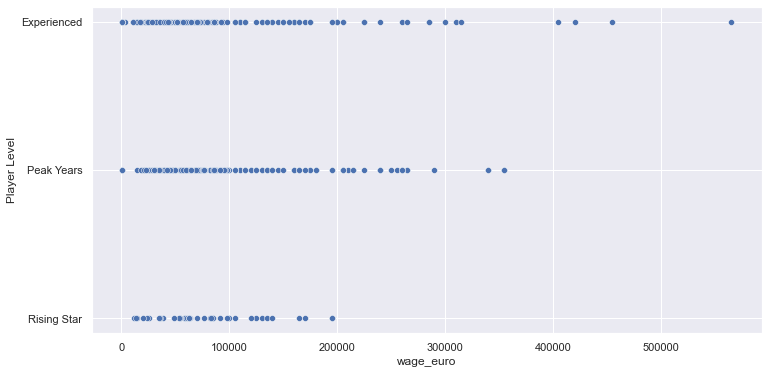

In [110]:
sns.scatterplot(data=top_players, x="wage_euro", y="Player Level")

Players Position and their Wage, by experience level

<AxesSubplot:xlabel='wage_euro', ylabel='player_position'>

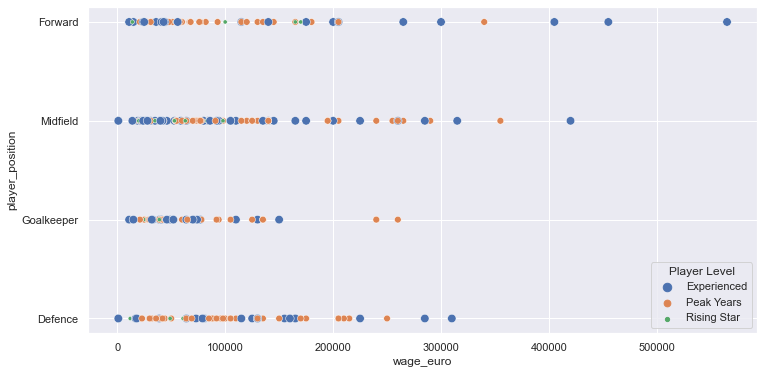

In [111]:
sns.scatterplot(data=top_players, x="wage_euro", y="player_position", hue="Player Level", size="Player Level")

Amount of Players and their experience level

[Text(0, 0, 'Peak Years'),
 Text(1, 0, 'Experienced'),
 Text(2, 0, 'Rising Star')]

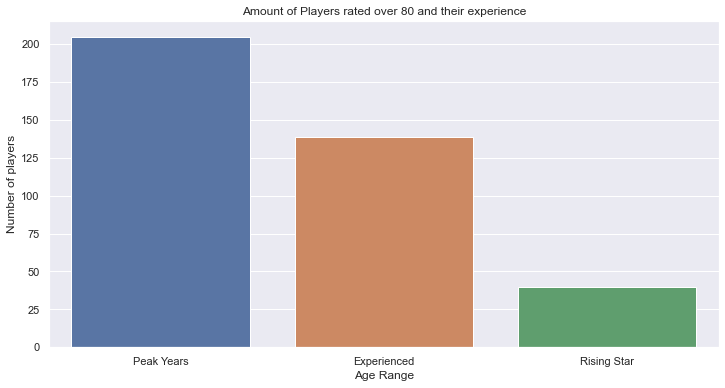

In [112]:
fig, ax1 = plt.subplots(figsize=(12,6))

graph = sns.countplot(ax=ax1, data=top_players, x='Player Level', order=top_players['Player Level'].value_counts().head(20).index,)

ax1.set(xlabel='Age Range',ylabel='Number of players',title='Amount of Players rated over 80 and their experience',)
graph.set_xticklabels(graph.get_xticklabels())

Finding the Clubs and Countries which have the most potential

In [113]:
top_potential = df[df["potential"] > 86].sort_values(by=['overall_rating'], ascending=False)

In [114]:
top_potential_age = top_potential[top_potential["age"] < 23 ].sort_values(by=['overall_rating'], ascending=False)

In [115]:
top_potential_age

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,GDP per Capita,2022 Population,Player Level,player_position
1227,K. Mbappé,1998-12-20,20,152.40,73.0,"RW,ST,RM",France,88,95,81000000.0,100000.0,Right,Paris Saint-Germain,84.0,LS,France,"$46,062",65584518,Rising Star,Forward
7127,D. Sánchez,1996-06-12,22,187.96,78.9,CB,Colombia,84,88,34000000.0,105000.0,Right,Tottenham Hotspur,83.0,SUB,Colombia,"$14,324",51512762,Rising Star,NaN
1231,O. Dembélé,1997-05-15,21,152.40,67.1,"RW,LW",France,84,92,46000000.0,170000.0,Left,FC Barcelona,86.0,LW,France,"$46,062",65584518,Rising Star,Forward
1233,K. Coman,1996-06-13,22,152.40,71.2,"LM,RM,LW,RW",France,83,88,34500000.0,85000.0,Right,FC Bayern München,85.0,LM,France,"$46,062",65584518,Rising Star,Midfield
6946,Gabriel Jesus,1997-04-03,21,175.26,73.0,ST,Brazil,83,92,41000000.0,130000.0,Right,Manchester City,85.0,SUB,Brazil,"$14,916",215353593,Rising Star,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,Riqui Puig,1999-08-13,19,170.18,55.8,CM,Spain,69,89,2100000.0,24000.0,Right,FC Barcelona,86.0,RES,Spain,"$39,121",46719142,Rising Star,NaN
4873,Sergio Gómez,2000-09-04,18,170.18,68.0,"CAM,CM,LM",Spain,68,87,1800000.0,8000.0,Left,Borussia Dortmund,81.0,RES,Spain,"$39,121",46719142,Rising Star,NaN
5815,Y. Verschaeren,2001-07-12,17,172.72,63.0,"CAM,RM,LM",Belgium,68,87,1800000.0,3000.0,Right,RSC Anderlecht,73.0,CAM,Belgium,"$51,096",11668278,Rising Star,Midfield
2533,P. Pellegri,2001-03-17,17,187.96,79.8,ST,Italy,67,88,1700000.0,11000.0,Right,AS Monaco,79.0,RES,Italy,"$40,861",60262770,Rising Star,NaN


Creating a Bar Chart to see the CLubs with the most young players with the highest potential

[Text(0, 0, 'Milan'),
 Text(0, 1, 'FC Barcelona'),
 Text(0, 2, 'Real Madrid'),
 Text(0, 3, 'Bayer 04 Leverkusen'),
 Text(0, 4, 'Roma'),
 Text(0, 5, 'FC Bayern München'),
 Text(0, 6, 'Olympique Lyonnais'),
 Text(0, 7, 'Fiorentina')]

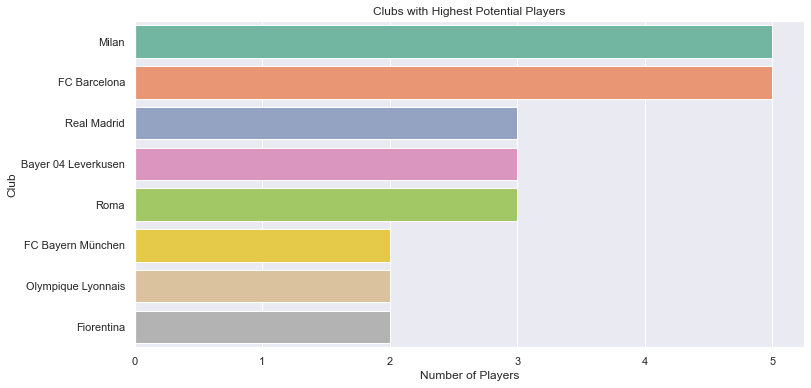

In [116]:
sns.set_theme(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(12,6))

graph = sns.countplot(ax=ax1, data=top_potential_age, y='club_team', order=top_potential_age['club_team'].value_counts().head(8).index, palette="Set2")

ax1.set(xlabel='Number of Players',ylabel='Club',title='Clubs with Highest Potential Players',)
graph.set_yticklabels(graph.get_yticklabels())

Creating a Bar Chart to see the Countries with the most young players with the highest potential

[Text(0, 0, 'Italy'),
 Text(0, 1, 'Spain'),
 Text(0, 2, 'France'),
 Text(0, 3, 'Brazil'),
 Text(0, 4, 'Germany'),
 Text(0, 5, 'Portugal')]

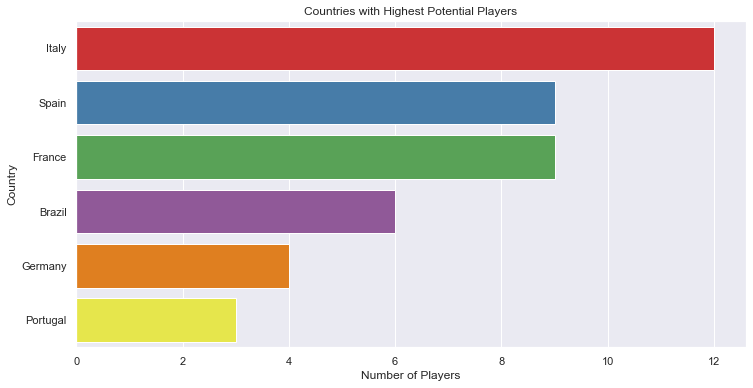

In [117]:
sns.set_theme(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(12,6))

graph = sns.countplot(ax=ax1, data=top_potential_age, y='Country', order=top_potential_age['Country'].value_counts().head(6).index, palette="Set1")

ax1.set(xlabel='Number of Players',ylabel='Country',title='Countries with Highest Potential Players',)
graph.set_yticklabels(graph.get_yticklabels())

Creating a lineplot in order to compare wage to overall rating

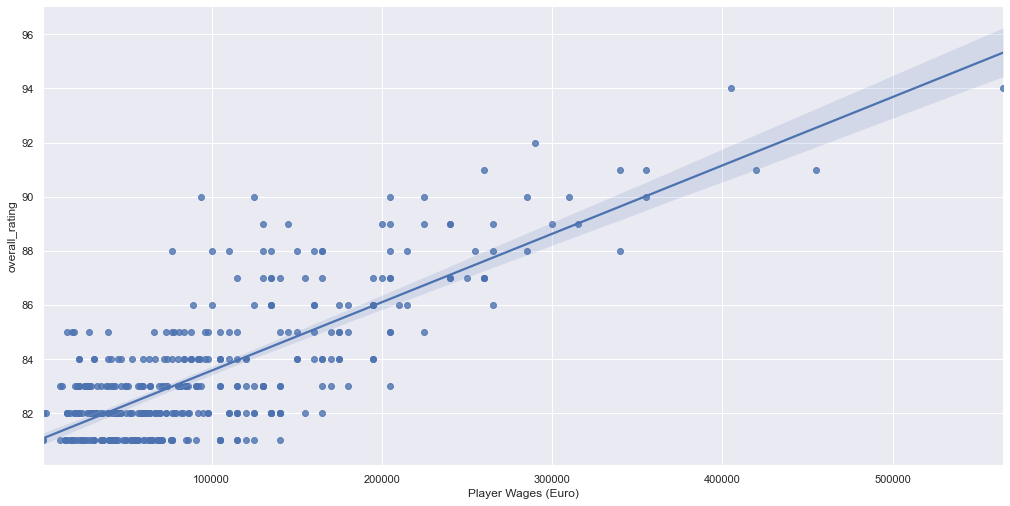

In [59]:
sns.lmplot(x="wage_euro", y="overall_rating", data=top_players, height=7, aspect=2)
plt.xlabel('Overall Rating')
plt.xlabel('Player Wages (Euro)')
plt.show()